In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
len_train = len(os.listdir(os.path.join("..", "data", "train", "images")))
len_val = len(os.listdir(os.path.join("..", "data", "val", "images")))
len_test = len(os.listdir(os.path.join("..", "data", "test", "images")))

print("len train", len_train)
print("len val", len_val)
print("len test", len_test)

len train 11695
len val 2506
len test 2507


In [3]:
def unmap_pred(pred):
    img = np.zeros((512, 512, 3), dtype=np.uint8)

    img[pred == 0] = [0, 0, 0]
    img[pred == 1] = [255, 0, 0]
    img[pred == 2] = [0, 255, 0]
    img[pred == 3] = [0, 0, 255]

    return img

In [4]:
inference_dir = os.path.join("..", "assets", "inference")
table_dir = os.path.join(inference_dir, "06-15-2024-13:00")

df = pd.read_parquet(table_dir)
df["prediction"] = df["prediction"].map(lambda x: x.reshape((512, 512)))
df["prediction"] = df["prediction"].map(unmap_pred)

df.head()

img_name      loss      miou  \
0   ID00322637202284842245491_52.jpg  0.024800  0.927972   
1   ID00105637202208831864134_15.jpg  0.004449  0.994840   
2   ID00331637202286306023714_26.jpg  0.008182  0.925797   
3  ID00323637202285211956970_105.jpg  0.007486  0.957270   
4  ID00426637202313170790466_123.jpg  0.022175  0.587606   

                                          prediction  
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

In [5]:
df["miou"].mean()

0.9279115556196526

In [6]:
# test
row = df.iloc[0]
img_name = row["img_name"]
pred = row["prediction"]

img_dir = os.path.join("..", "data", "test", "images", img_name)
mask_dir = os.path.join("..", "data", "test", "masks", img_name)

img = Image.open(img_dir).convert("L")
mask = Image.open(mask_dir).convert("RGB")

In [7]:
preds = df["prediction"].tolist()

img_paths = df["img_name"].map(lambda img_name: os.path.join("..", "data", "test", "images", img_name)).tolist()
mask_paths = df["img_name"].map(lambda img_name: os.path.join("..", "data", "test", "masks", img_name)).tolist()

imgs = [Image.open(img).convert("RGB") for img in img_paths]
masks = [Image.open(img).convert("RGB") for img in mask_paths]

Generating Predictions:   0%|          | 0/2496 [00:00<?, ?it/s]

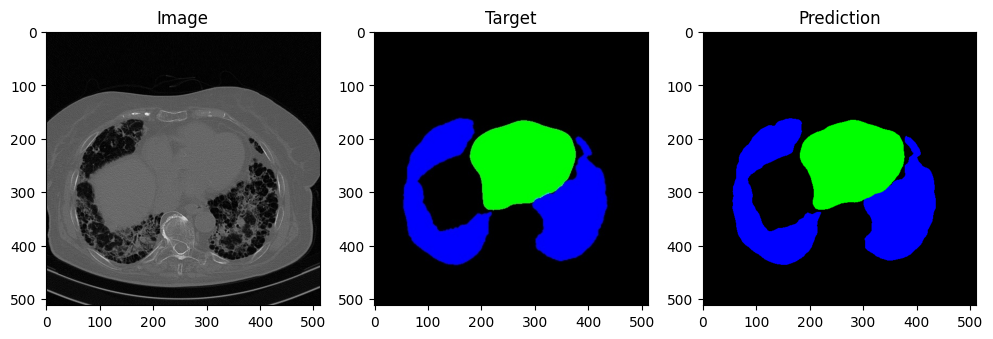

Generating Predictions:   0%|          | 1/2496 [00:00<08:39,  4.80it/s]

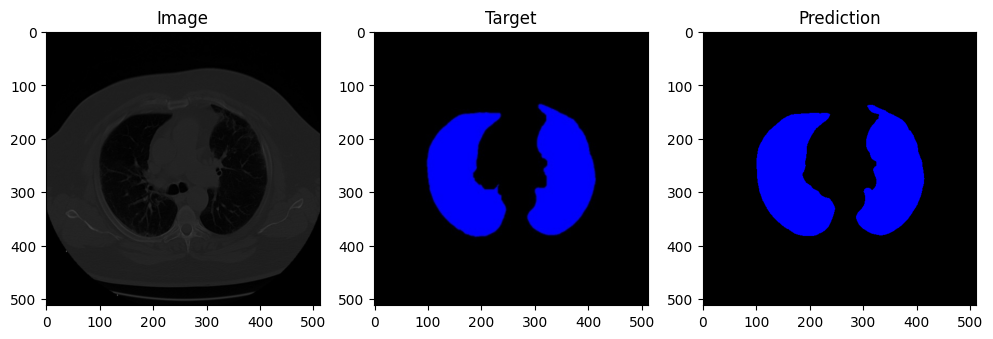

Generating Predictions:   0%|          | 2/2496 [00:00<08:07,  5.12it/s]

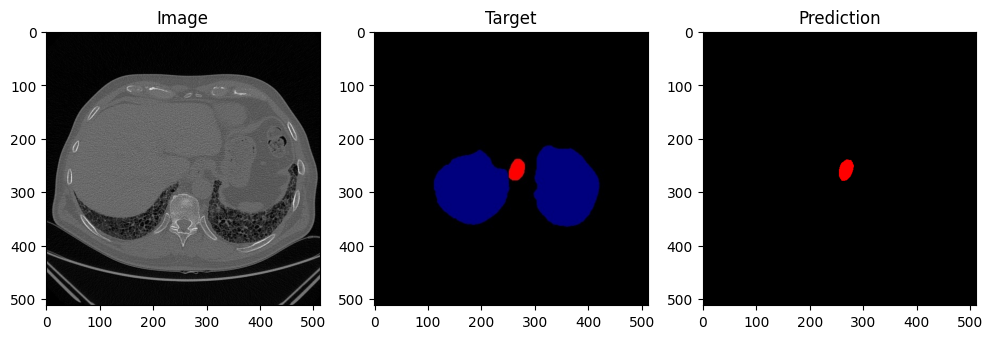

Generating Predictions:   0%|          | 3/2496 [00:00<09:49,  4.23it/s]

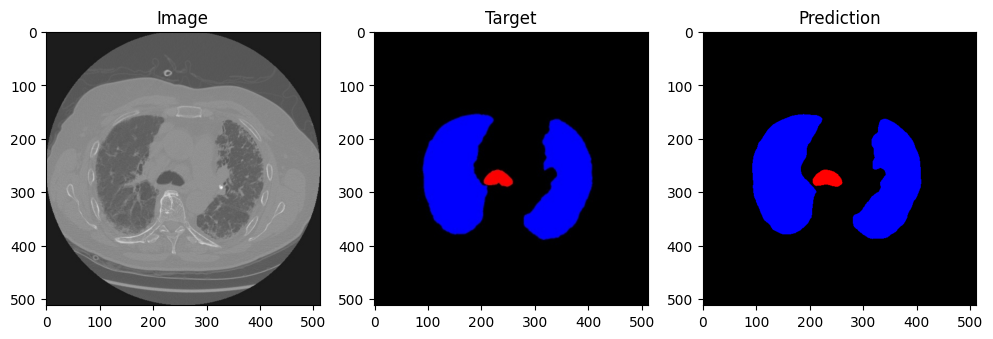

Generating Predictions:   0%|          | 4/2496 [00:00<09:01,  4.61it/s]

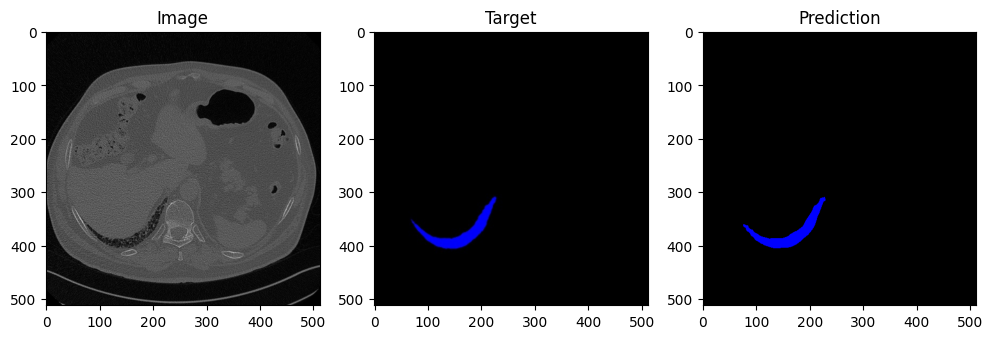

Generating Predictions:   0%|          | 5/2496 [00:01<09:00,  4.61it/s]

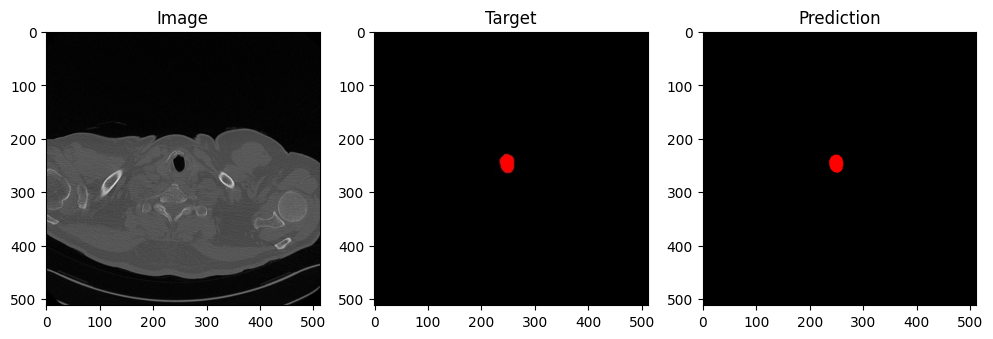

Generating Predictions:   0%|          | 6/2496 [00:01<08:38,  4.81it/s]

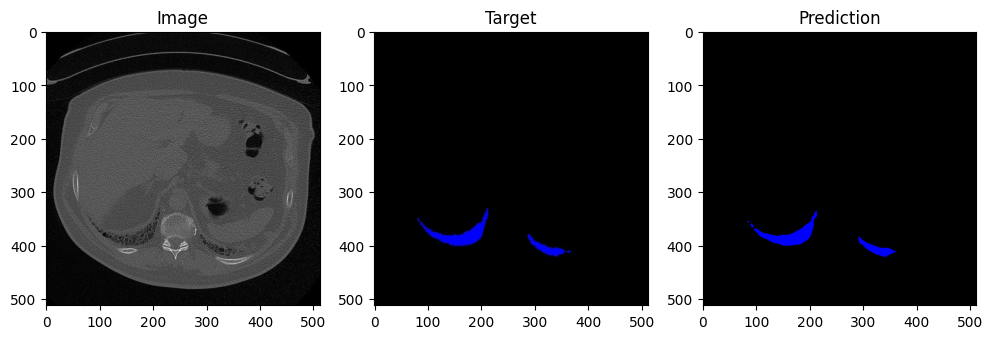

Generating Predictions:   0%|          | 7/2496 [00:01<08:22,  4.95it/s]

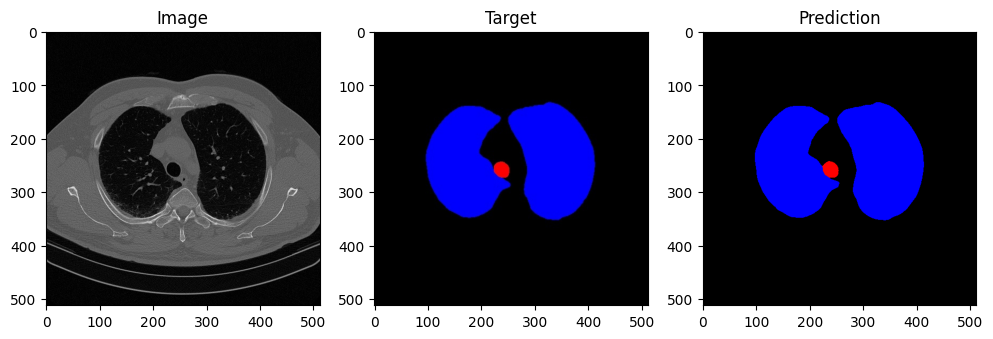

Generating Predictions:   0%|          | 8/2496 [00:01<08:14,  5.03it/s]

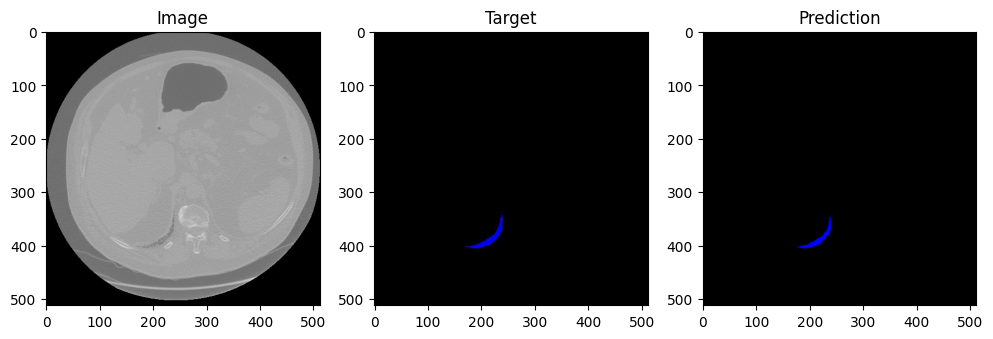

Generating Predictions:   0%|          | 9/2496 [00:01<08:04,  5.13it/s]

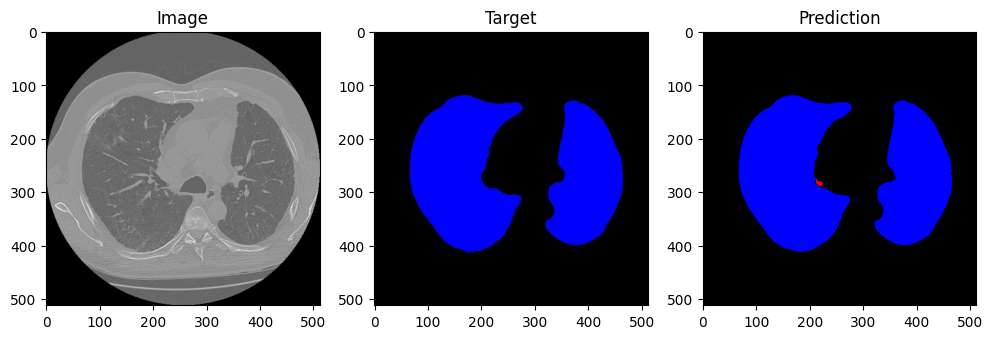

Generating Predictions:   0%|          | 10/2496 [00:02<08:00,  5.17it/s]

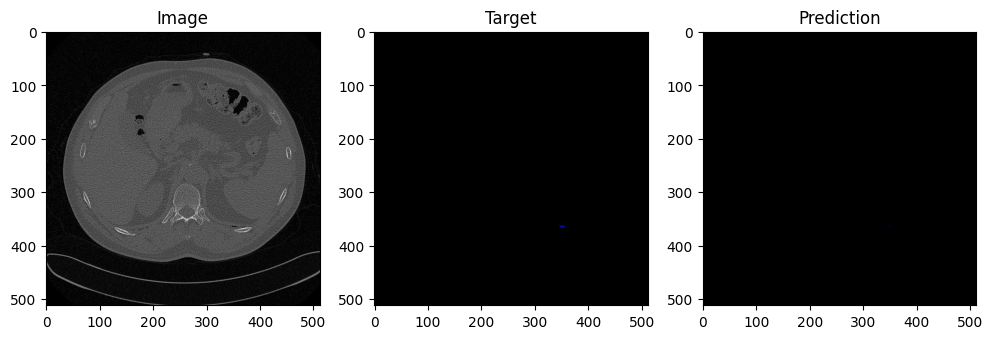

Generating Predictions:   0%|          | 11/2496 [00:02<08:17,  5.00it/s]

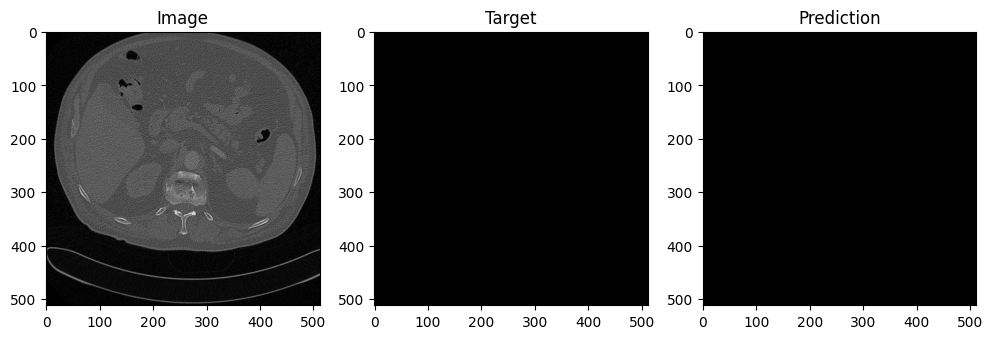

Generating Predictions:   0%|          | 12/2496 [00:02<08:06,  5.10it/s]

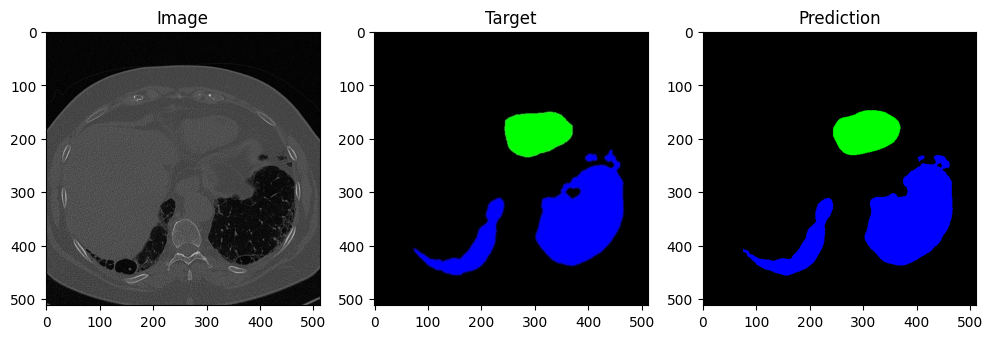

Generating Predictions:   1%|          | 13/2496 [00:02<08:02,  5.15it/s]

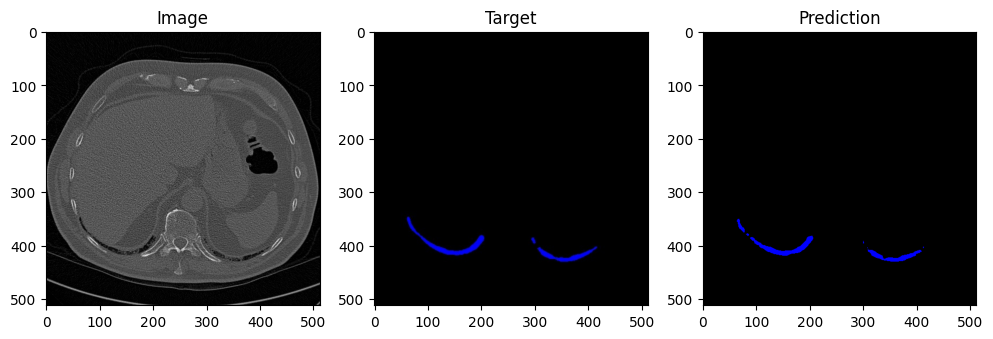

Generating Predictions:   1%|          | 14/2496 [00:02<07:54,  5.23it/s]

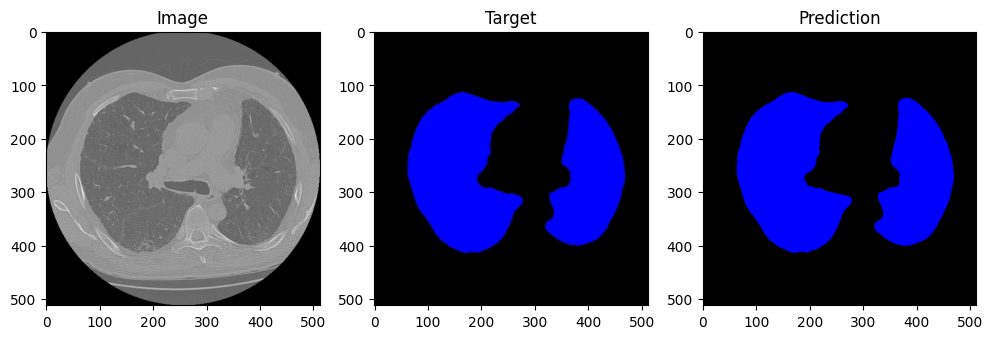

Generating Predictions:   1%|          | 15/2496 [00:03<07:55,  5.21it/s]

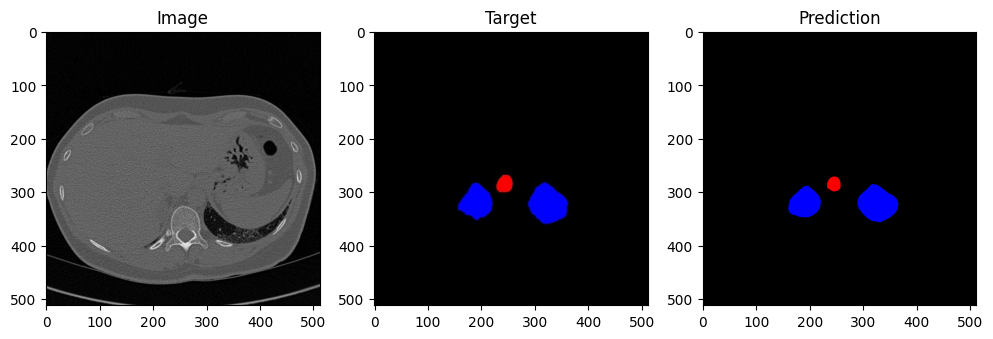

Generating Predictions:   1%|          | 16/2496 [00:03<09:39,  4.28it/s]

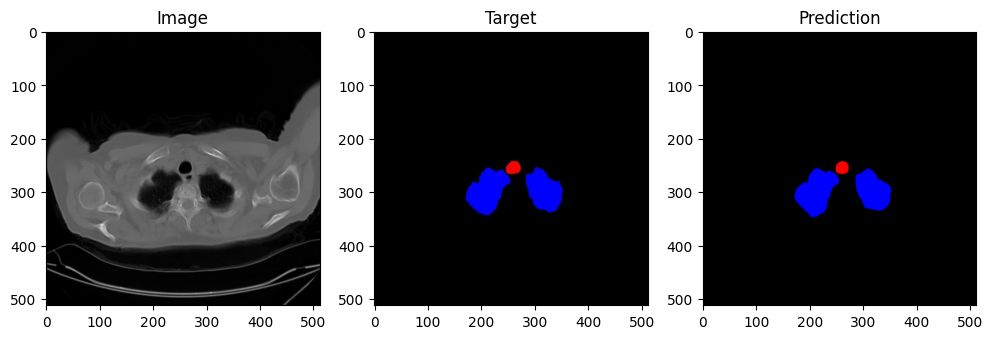

Generating Predictions:   1%|          | 17/2496 [00:03<09:03,  4.56it/s]

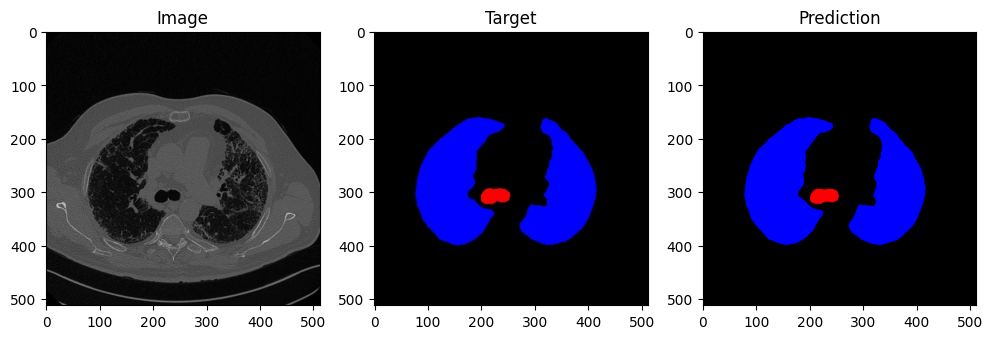

Generating Predictions:   1%|          | 18/2496 [00:03<08:54,  4.64it/s]

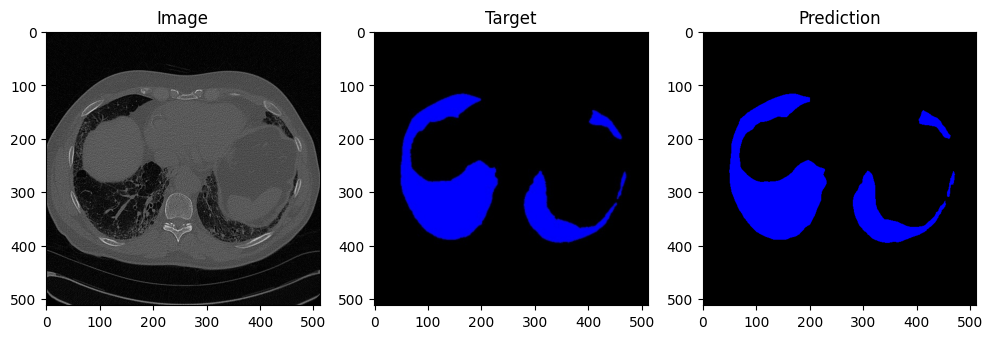

Generating Predictions:   1%|          | 19/2496 [00:03<09:10,  4.50it/s]

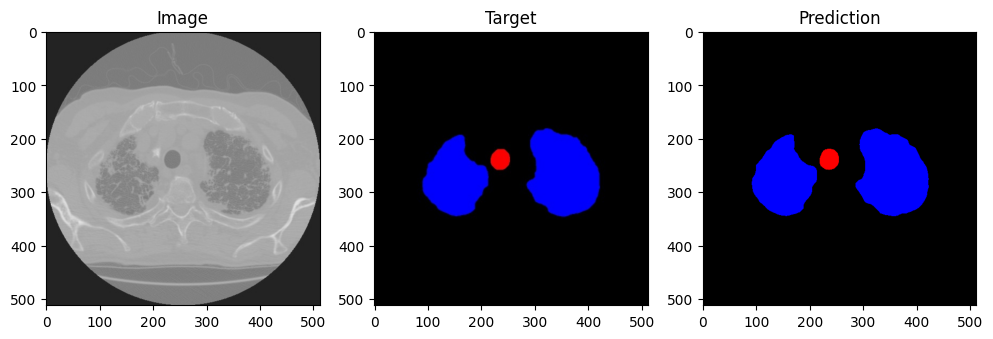

Generating Predictions:   1%|          | 20/2496 [00:04<08:48,  4.68it/s]

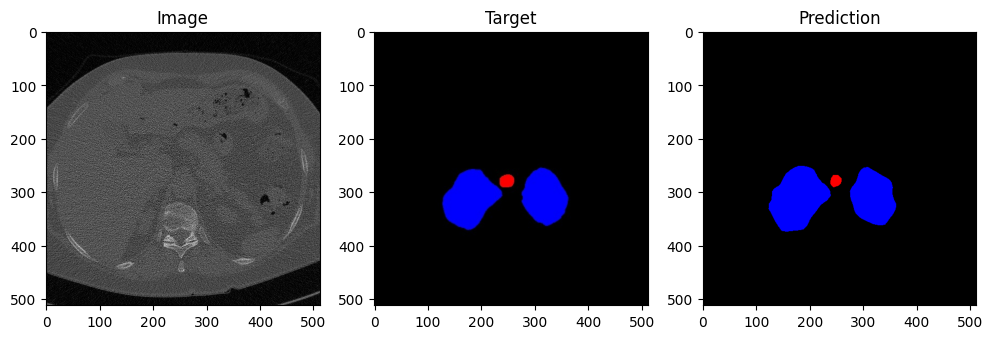

Generating Predictions:   1%|          | 21/2496 [00:04<08:33,  4.82it/s]

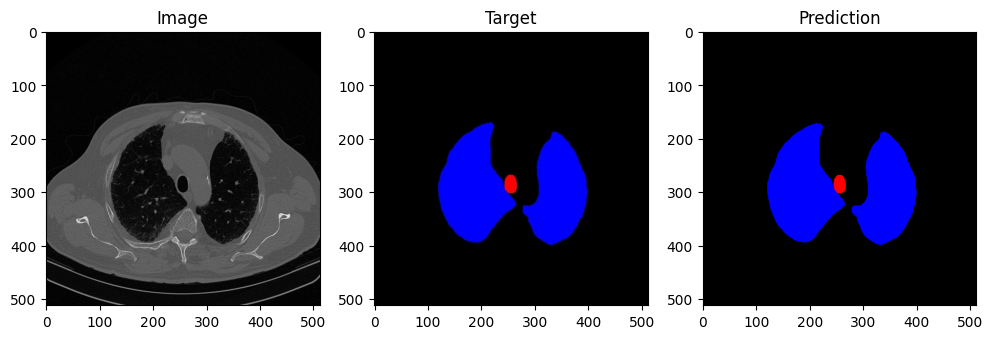

Generating Predictions:   1%|          | 22/2496 [00:04<08:20,  4.94it/s]

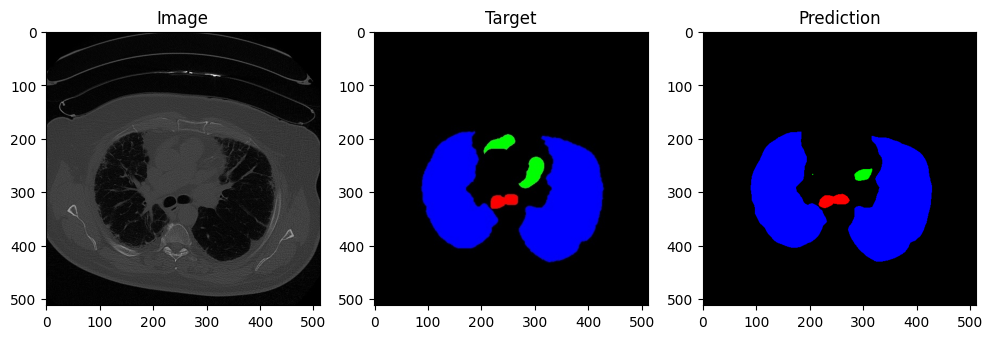

Generating Predictions:   1%|          | 23/2496 [00:04<08:33,  4.81it/s]

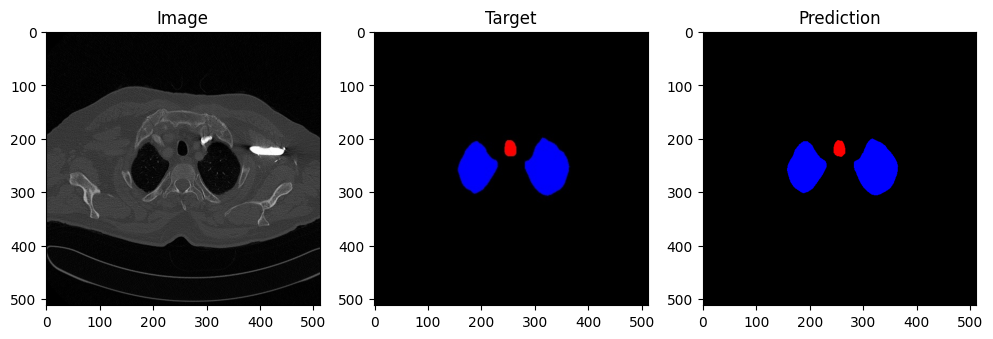

Generating Predictions:   1%|          | 24/2496 [00:04<08:22,  4.92it/s]

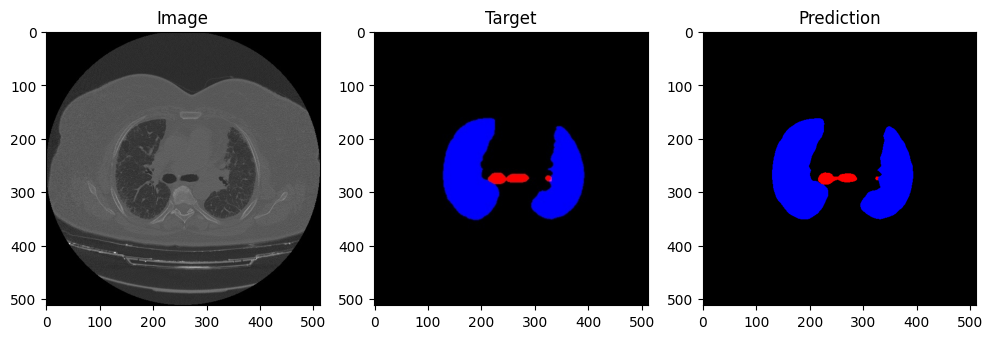

Generating Predictions:   1%|          | 25/2496 [00:05<08:09,  5.05it/s]

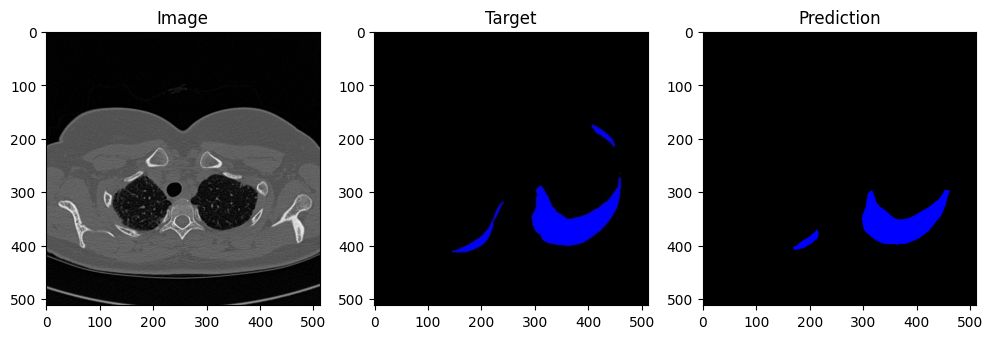

Generating Predictions:   1%|          | 26/2496 [00:05<08:19,  4.95it/s]

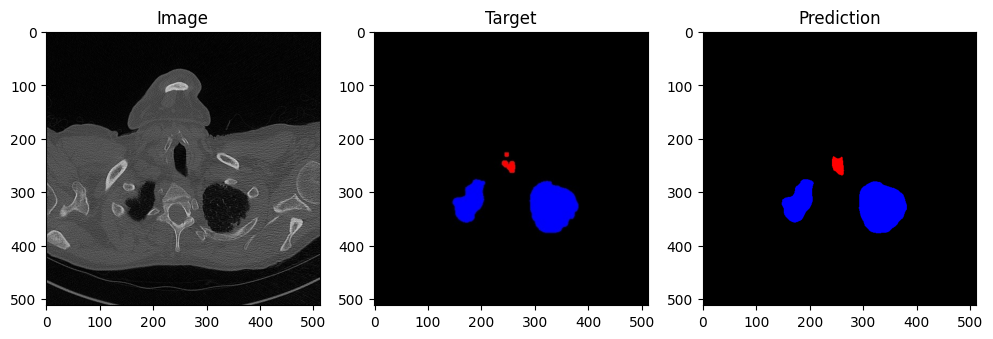

Generating Predictions:   1%|          | 27/2496 [00:05<08:06,  5.08it/s]

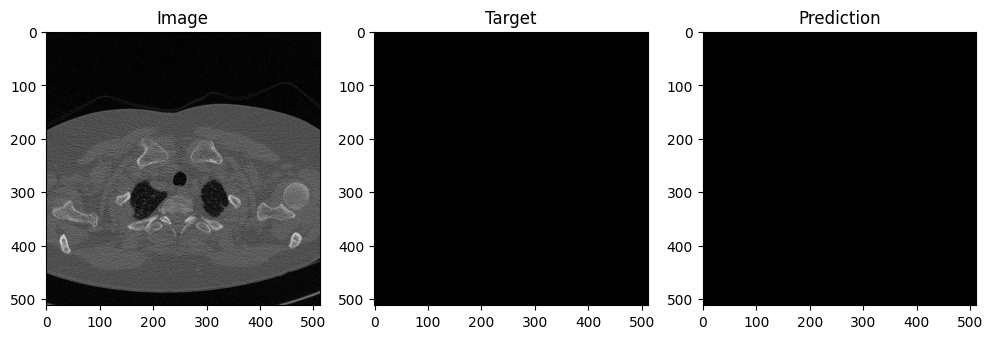

Generating Predictions:   1%|          | 28/2496 [00:05<09:16,  4.44it/s]

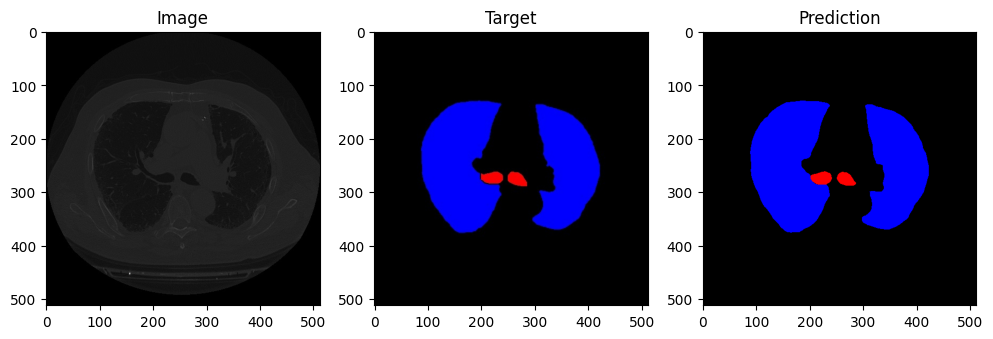

Generating Predictions:   1%|          | 29/2496 [00:06<09:07,  4.51it/s]

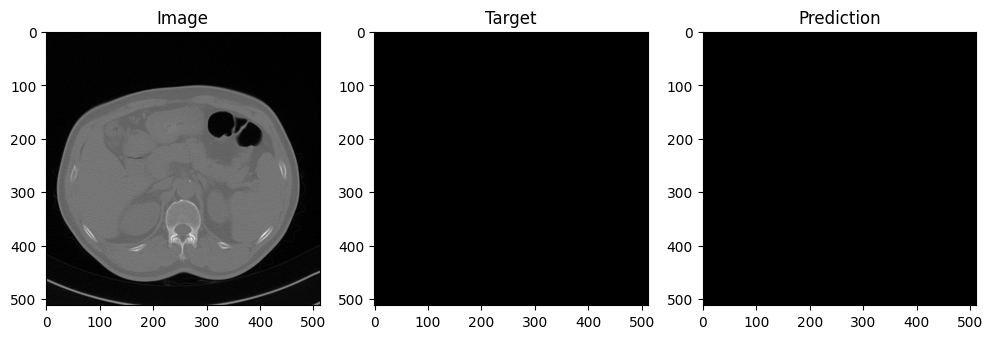

Generating Predictions:   1%|          | 30/2496 [00:06<08:44,  4.70it/s]

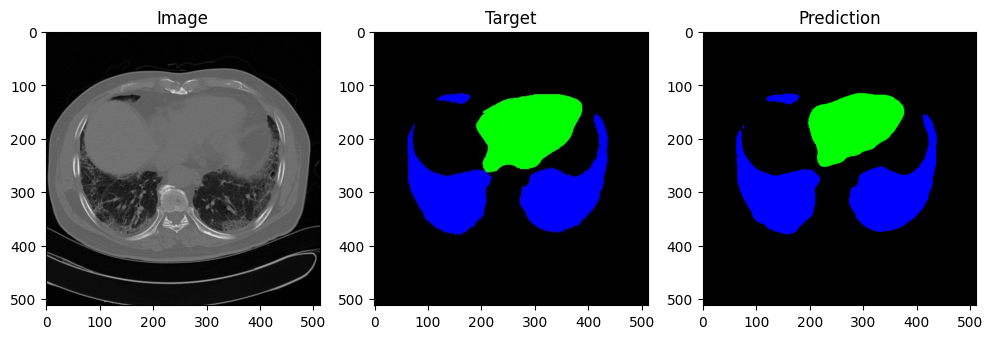

Generating Predictions:   1%|          | 31/2496 [00:06<08:51,  4.64it/s]

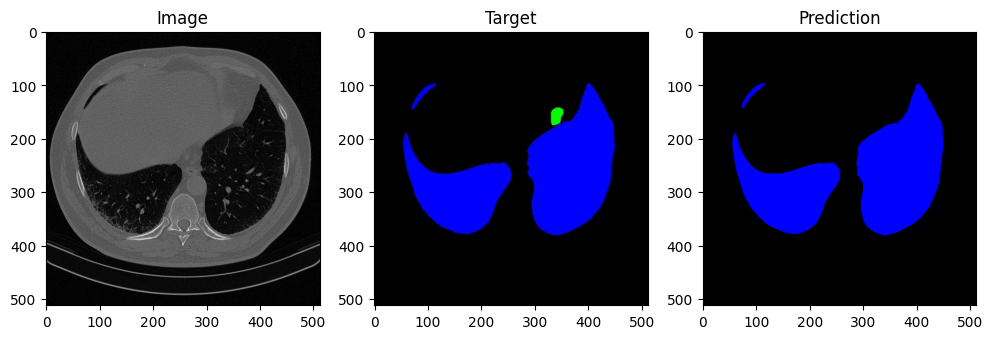

Generating Predictions:   1%|▏         | 32/2496 [00:06<08:39,  4.74it/s]

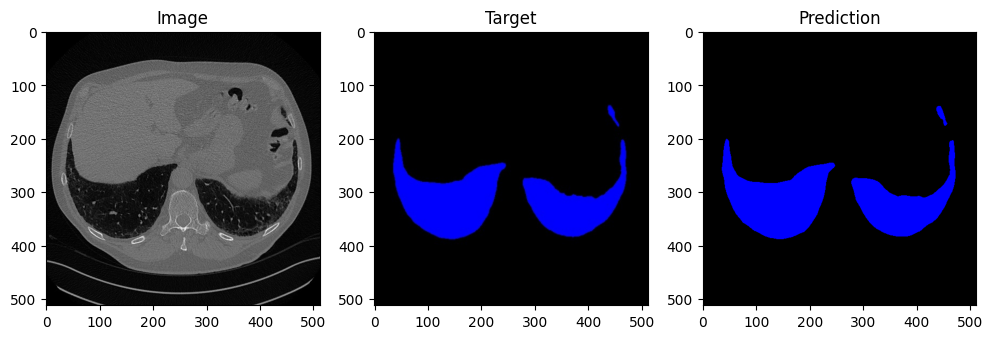

Generating Predictions:   1%|▏         | 33/2496 [00:07<08:42,  4.71it/s]


KeyboardInterrupt: 

In [13]:
for i in tqdm(range(len(preds)-1, len(preds[:10]), -1), desc="Generating Predictions"):

    img = imgs[i]
    mask = masks[i]
    pred = preds[i]

    fig, axes = plt.subplots(1, 3, figsize=(4*3, 4))

    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Image")

    axes[1].imshow(mask)
    axes[1].set_title("Target")

    axes[2].imshow(pred)
    axes[2].set_title("Prediction")

    plt.show()

plt.close('all')